## CS 510: Analytics and Data Science
### NLP Data Science Project: Sarcasm in Reddit Comments 

This Jupyter Notebook will demostrate some of the lexical analysis features of the NLTK Library on sarcastic reddit posts.

### Load Dependencies
#### Import the required packages (install them if you haven't already)
Display my Python Package Library versions and verify software dependencies loaded:

In [1]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
#import sys
#sys.modules.pop('matplotlib')
import matplotlib
from matplotlib import pyplot as plt
#import matplotlib.pyplot as plt
# from collections import defaultdict
from IPython.display import display, HTML
display(HTML("<style>pre { white-space: pre !important; }</style>"))
plt.rcdefaults()
%matplotlib inline
#%matplotlib notebook

print(f"NLTK: {nltk.__version__}")
print(f"Pandas: {pd.__version__}")
print(f"matplotlib: {matplotlib.__version__}")


NLTK: 3.4.5
Pandas: 0.25.3
matplotlib: 3.1.2


#### Load Sarcastic Content and Meta Data from CSV file
Loading the sarcastic reddit comments and meta-data from a tab delimited CSV file.

In [2]:
#file = 'sarc_s_meta_100k.csv'
file = 'sarc_s_meta_10k.csv'
#file = 'sarc_s_meta_10.csv'
col_headers = ['label', 'comment', 'author', 'subreddit', 'rank', 'up', 'down',
               'date', 'Unix Time', 'Parent Comment', 'Parent ID', 'Link ID']
comments_df = pd.read_csv(file, names=col_headers, sep='\t', error_bad_lines=False, quoting=3) # quotechar=None)

# Remove Rows with Null Column Values
for col in col_headers:
    # if you want to allow null colunmn values for parent comments
    #if col != 'parent_comment' or col != 'parent_comment_id':
    comments_df = comments_df[pd.notnull(comments_df[col])]

pd.set_option('display.max_rows', 10)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 12)

df = pd.DataFrame(comments_df[0:9])

# Set table styles
styles = [ dict(selector="th", props=[('text-align', 'center')]),
           dict(selector="th", props=[('white-space', 'nowrap')]),
           dict(selector="td", props=[('text-align', 'left')]) ]
styled_df = (df.style
             .set_properties(subset=df.columns[0],  **{'white-space':'nowrap'})
             .set_properties(subset=df.columns[1],  **{'width': '300px'})
             .set_table_styles(styles))

html = styled_df.hide_index().render()
display(HTML(html))

# comments = comments_df['comment'].str.cat()

label,comment,author,subreddit,rank,up,down,date,Unix Time,Parent Comment,Parent ID,Link ID
1,I need a girlfriend?!? OMG I am insulted! And the code is wrong anyway IDIOTS!,bigmell,programming,1,1,0,2009-01,1.23343e+09,What if you can see how wrong that code is?,c07e0zz,7tv5i
1,That socialist bastard,kingkilr,politics,20,20,0,2009-01,1.23343e+09,"Under Eisenhower millionares paid about a 90% income tax, and the 50s was when the middle class exploded and college education became the norm.",c07e0iu,7tvv7
1,Why no one would understand that Israel is a peaceful country? They do that only to avoid war!,BanX,worldnews,2,2,0,2009-01,1.23341e+09,"""Israeli Ambassador to Australia Says Will """"Deal With"""" Iran's Nuclear Program Within a Month""",c07dv92,7tsr2
1,"Oh sure, blame it all on the Jews. How original.",wolfzero,worldnews,-2,-2,0,2009-01,1.23339e+09,...and I am to Blame?,c07dtko,7tqmc
1,"This guy sucks. If they let him on, I'll never watch that show again. :(",rlee0001,funny,1,1,0,2009-01,1.23339e+09,Never Forget: Phil Hartman,c07dt1x,7tt32
1,"Hey, look at me! I'm saying shit about MS. I'm so cool and popular!",MoBe,technology,-1,-1,0,2009-01,1.23338e+09,The most unwanted Firefox extension ever invented.,c07ds32,7tog0
1,"After all, they may be smuggling in weapons on a humanitarian aid mission.",jo42,reddit.com,2,2,0,2009-01,1.23338e+09,Israel has refused to allow a French-made water purification system into Gaza amid a drinking water crisis in the Palestinian strip.,c07dq0s,7tpd9
1,Anti-semitic holocaust denier!,veritaze,Economics,5,5,0,2009-01,1.23337e+09,Secret Israeli database reveals full extent of illegal settlement,c07dp94,7trok
1,"wow, that's such a brave thing to say",kublakhan,Music,2,2,0,2009-01,1.23335e+09,Fleet Foxes Hate Major labels,c07dg8y,7tglx


#### Tokenization
Create a custom tokenizer to remove punctuation and stopwords.  Stopwords are common words like 'the', 'and', 'an', etc.

In [3]:
comments = comments_df['comment'].str.cat()

tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))

tokens = nltk.word_tokenize(comments)
tokens_no_punct = tokenizer.tokenize(comments)
text = nltk.Text(tokens_no_punct)

text_filtered = nltk.Text([w.lower() for w in text.tokens if w.lower() not in stop_words])


#### Counting Words, Frequency Distributions, and Collocations
We can simply count the number of tokens in a corpus, the number of unique tokens (word types), the
lexical diversity of a corpus, the occurrences of a specific word, and the percentage that a word takes up
in a corpus, among many other calculations we can make. This will give us some sense of how large the
corpus is, how lexically rich it is and allows us to start poking around the corpus.

In [4]:
comments = comments_df['comment'].str.cat()
tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))
tokens = nltk.word_tokenize(comments)
tokens_no_punct = tokenizer.tokenize(comments)
text = nltk.Text(tokens_no_punct)
text_filtered = nltk.Text([w.lower() for w in text.tokens if w.lower() not in stop_words])

print(len(text))                  # Total number of tokens
print(len(set(text)))             # number of unique tokens
print(len(set(text)) / len(text)) # lexical diversity
print(text.count("oh"))           # occurances of a word
print(100 * text.count("oh") / len(text)) # % of text

92882
12628
0.13595745138993562
31
0.033375680971555306


### Common Words, Concordance Searching and Frequency Distributions 
We can display the most common words, perform condordance searches and display frequency distributions.

[('like', 419), ('people', 386), ('yeah', 356), ('would', 325), ('get', 292), ('right', 283), ('know', 265), ('well', 237), ('one', 220), ('good', 216), ('yes', 201), ('oh', 187), ('us', 187), ('see', 182), ('god', 179), ('never', 175), ('sure', 173), ('could', 163), ('way', 155), ('really', 154)]
Displaying 25 of 283 matches:
ists have some splainin to do You re right Israel actually controls Hamas leade
taurants that sell such cheaper soda right Yeah fuck them for recording valid e
ky before no way that he ll get this right Aah Accenture Fond memoriesyou forgo
ful death is really the way to go Oh right both wars were just jewish conspirac
 mine wasn t guarded they could walk right in and get uranium 235 I m gonna sle
ct in our interest not self interest right So now what socialism in the monetar
en to the poor that ll teach em It s right there in the Bible silly What more d
sements How fantastic FINALLY You re right we should start sterilizing brown pe
ne but don t you know EVERYONE 

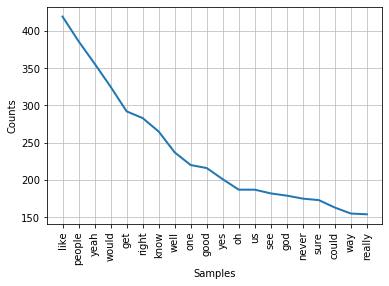

In [5]:
fdist = nltk.FreqDist(text_filtered)
print(fdist.most_common(20))

# Concordance Search of the word 'right'
print(text.concordance('right'))

# Plot a Fequency Distribution of the 10 most common words
#fdist.plot(20, cumulative=False)
fdist.plot(20)

### Display a lexical Dispersion Plot
Show a word's importance weighted by it's lexical disperson in a corpus

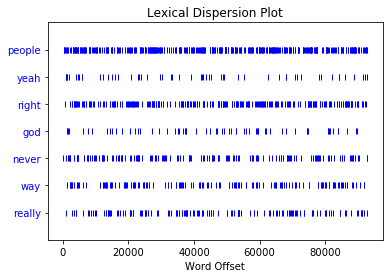

In [6]:
word_list = ['people', 'yeah', 'right', 'god', 'never', 'way', 'really']
text.dispersion_plot(word_list)

### Similar words, Common Contexts, and Collocations
Show a word's importance weighted by it's lexical disperson in a corpus

In [7]:
# Search of words that appear in a similar range of contexts as 'never'
print(text.similar('never'))
# Common Contexts
text.common_contexts(["never", "really"])
# Collocations
# print(text.collocation_list())  # <-- error ValueError: too many values to unpack (expected 2)
print('; '.join(text.collocation_list()))

they not only we all just totally it you ever also i he now really and
would this guess there
None
s_going can_be reddit_has
global warming; health care; Everyone knows; much better; United States; Sarah Palin; free market; Ron Paul; birth certificate; Fox News; would never; years ago; Tea Party; year old; anti semite; Lindsay Lohan; black people; everyone knows; climate change; good thing


### Other metrics
* Number of comments in each subreddit
* Comment Scores
* Comment Length: How many words
* Sentence Length 
https://andrewpwheeler.com/2016/06/08/sentence-length-in-academic-articles/